In [30]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [31]:
E0=-11861477.311099075 # pristine
E1=-11872355.158936081 # addon S
E2=-11850595.236526014 # mono S vacancy
E3=-11839713.678988820 # di S vacancy up&down
E4=-11839713.145423420 # di S vacancy neighboring
E5=-11408771.970668823 # mono Mo vacancy
E_WS2=-474458.138971034 # primtitive


ES8=-87031.346957    #8 atoms in unitcell
mu_S8=ES8/8
EW=-905397.333160509 # Total energy in eV
mu_Wbcc=EW/2



In [32]:
p0=1e+06  # 
k=1.380649e-16
h=6.62607015e-27
hbar=1.054571817e-27
sigma=8
pi=3.14159265359
m=4.258952992e-22
IA=1.314051643394595e-37
IB=1.314146807283309e-37
IC=2.42660958899724e-37
R=8.31446261815324
convert=29979245800.0*2*pi #cm^-1 to Hz

In [33]:
A=[]
for T in range(300,4100,100):
    A = np.append(np.log((((2*pi*m)**(3/2))*((k*T)**(5/2)))/(p0*(h**3))),A)
#print('A= ', A)


In [34]:
B=[]
for T in range(300,4100,100):
    I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
    B=np.append(np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*k*T)/(h**2))**(3/2))*I),B)
#print('B= ', B)

In [35]:
C=[]
w=[2.10968990e-01, 7.42646474e+01, 7.43325628e+01, 1.36225482e+02,
 1.36290076e+02, 1.85771263e+02, 1.85786796e+02, 2.12035325e+02,
 2.28606326e+02, 2.45210844e+02, 2.45241312e+02, 3.56870108e+02,
 3.90002968e+02, 3.90080384e+02, 4.51735833e+02, 4.51793806e+02,
 4.61001272e+02, 4.61044236e+02, 4.70393264e+02]
w=np.array(w)*convert
for T in range(300,4100,100):
    temp=-numpy.array([(np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
    C=np.append(np.sum(temp),C)
   

In [36]:
D=[]
#for T in range(100,1010,10):
temp=numpy.array([(hbar*i)/(2) for i in w])
D=np.sum(temp)
#print('D= ', D)

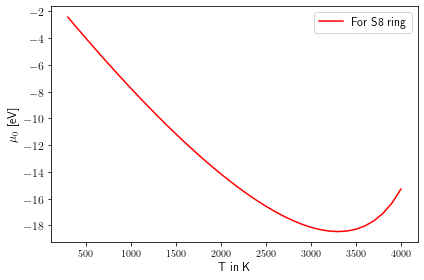

In [37]:
k=8.617333262145e-05 ###########
T=arange(300,4100,100)
mu_0=-k*T*(A+B+C)
plt.plot(T,mu_0, 'red', label='For S8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_0$ [eV]', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('mu0_T.pdf')

In [38]:
E_DFT=-87031.346957 #ev
p=1914.57 # 1.89e-3 atm (atm to cgs * 1013250))

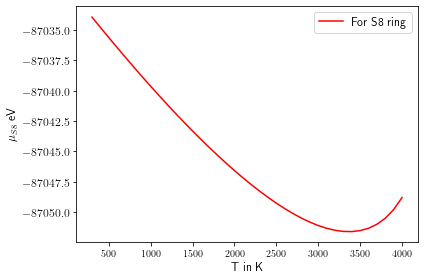

In [39]:
T=arange(300,4100,100)
mu_S8=mu_0 + k*T*np.log(p/p0)+D + E_DFT
plt.plot(T,mu_S8, 'red', label='For S8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

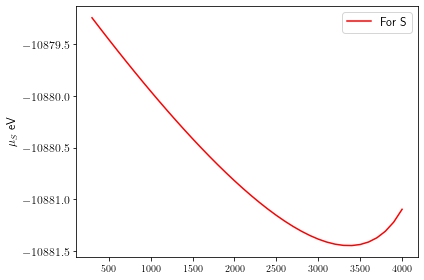

In [40]:
mu_S=mu_S8/8
plt.plot(T,mu_S, 'red', label='For S')
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.pdf')

In [41]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)

# cm-1 to Hz
convert=29979245800.0*2*pi #cm^-1 to Hz
hbar=6.582119569e-16 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VW']*convert #THZ to Hz

In [42]:
k=8.617333262145e-5
hbar=6.582119569e-16

In [43]:
def free_energy(w):
   F=[]
  
   w = numpy.array(w)
   for T in arange(300,4100,100):
      
     temp=numpy.array([(hbar*i/2 + k*T*np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
     F.append(numpy.sum(temp))


   return F

In [44]:
def DeltaF(A,B):
   deltaF=[]
   F1=free_energy(A)
   F2=free_energy(B)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

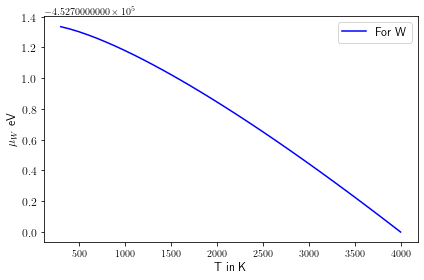

In [45]:
EW=-905397.333160509  # Total energy in eV
mu_Wbcc=EW/2

convert=29979245800.0*2*pi #cm^-1 to Hz
d6=pd.read_csv('W_BCC', sep='\s+',header=0)
w=d6['x']*convert # kj/mol to eV
Fphon=free_energy(w)
Fphon=np.array(Fphon)


V=  0.313300E+02  # volume of unitcell A^3
p= 7.776416678793729e-07 # atm
PV=p*V*6.3242093e-07 # to eV
T=arange(300,4100,100)
mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(T,mu_W, 'blue', label='For W')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.pdf')

In [46]:
def conc(r):
   rho=[]
   for T,i in zip(arange(300,4100,100),r):
 #  for T in arange(100,1010,10):
       temp=math.exp(-i/(k*T))
       rho.append(temp)
   return rho

In [47]:
addS = [E1-E0-a + b for a, b in zip(mu_S, DeltaF(w1,w0))]
VS = [E2-E0+a + b for a, b in zip(mu_S, DeltaF(w2,w0))]
VS2 = [E3-E0+2*a + b for a, b in zip(mu_S, DeltaF(w3,w0))]
VS22 = [E4-E0+2*a + b for a, b in zip(mu_S, DeltaF(w4,w0))]
VW = [E5-E0+a + b for a, b in zip(mu_W, DeltaF(w5,w0))]

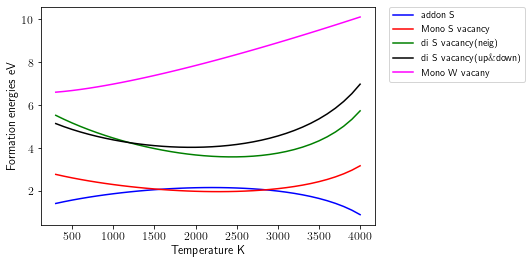

In [48]:
T=arange(300,4100,100)
plt.plot(T, addS, 'b', label='addon S')
plt.plot(T, VS, 'r', label='Mono S vacancy')
plt.plot(T, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
plt.plot(T, VW, 'magenta', label='Mono W vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

#plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T.pdf')
plt.show()

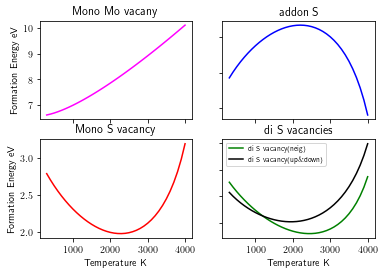

In [50]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(T, VW, 'magenta', label='Mono W vacany')
axs[0, 0].set_title('Mono Mo vacany')
axs[0, 1].plot(T, addS, 'b', label='addon S')
axs[0, 1].set_title('addon S')
axs[1, 0].plot(T, VS, 'r', label='Mono S vacancy')
axs[1, 0].set_title('Mono S vacancy')
axs[1, 1].plot(T, VS22, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].set_title('di S vacancies')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Ef_2_T.pdf')   

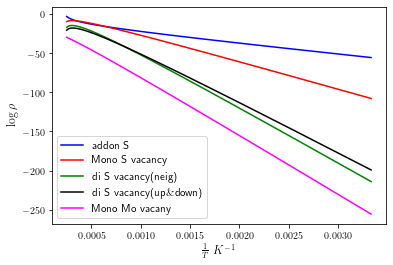

In [52]:
rho1=conc(addS)
rho2=conc(VS)
rho3=conc(VS22)
rho4=conc(VS2)
rho5=conc(VW)

T=arange(300,4100,100)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono Mo vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
plt.savefig('logarithm_rho.pdf')  
plt.show()

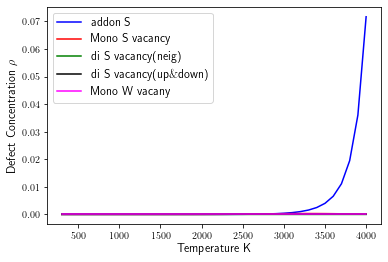

In [54]:
T=arange(300,4100,100)
plt.plot(T,rho1 , 'b', label='addon S')
plt.plot(T, rho2, 'r', label='Mono S vacancy') 
plt.plot(T, rho3, 'g', label='di S vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono W vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.pdf')
plt.show()

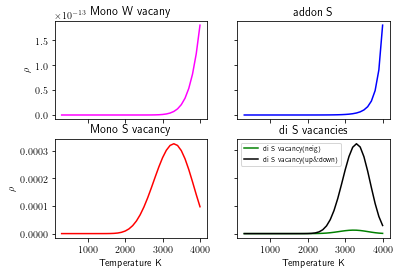

In [55]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(T, rho5, 'magenta', label='Mono W vacany')
axs[0, 0].set_title('Mono W vacany')
axs[0, 1].plot(T, rho1, 'b', label='addon S')
axs[0, 1].set_title('addon S')
axs[1, 0].plot(T, rho2, 'r', label='Mono S vacancy')
axs[1, 0].set_title('Mono S vacancy')
axs[1, 1].plot(T, rho4, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, rho3, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].set_title('di S vacancies')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel=r'$\rho$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('rho_2_T.pdf') 